# Problem 2.4

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 2**

**Problem 2.4**


**Estimate the UV content (280-400nm) and the total irradiance in the extraterrestrial reference spectrum AM0, the global reference spectrum AM1.5G, and the direct reference spectrum AM1.5D**

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data.

In [2]:
datafile = pd.read_csv('data/Reference_spectrum_ASTM-G173-03.csv', index_col=0, header=0) 
datafile

,AM0,AM1.5G,AM1.5D
Wvlgth nm,Etr W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
280,8.20E-02,4.73E-23,2.54E-26
280.5,9.90E-02,1.23E-21,1.09E-24
281,1.50E-01,5.69E-21,6.13E-24
281.5,2.12E-01,1.57E-19,2.75E-22
...,...,...,...
3980,8.84E-03,7.39E-03,7.40E-03
3985,8.80E-03,7.43E-03,7.45E-03
3990,8.78E-03,7.37E-03,7.39E-03
3995,8.70E-03,7.21E-03,7.23E-03


In [3]:
datafile.drop(datafile.index[0], inplace=True) #remove row including information on units
datafile=datafile.astype(float) #convert values to float for easy operation
datafile.index=datafile.index.astype(float) #convert indexes to float for easy operation

We start by calculating the total irradiance AM0, AM1.5G and AM1.5D.

In [4]:
for spectra in ['AM0', 'AM1.5G', 'AM1.5D']:
    irradiance=np.trapz(datafile[spectra], x = datafile.index)
    print('Total irradiance in ' + spectra + ' = ' + str(irradiance.round(1)) + ' W/m2')

Total irradiance in AM0 = 1348.0 W/m2
Total irradiance in AM1.5G = 1000.5 W/m2
Total irradiance in AM1.5D = 900.2 W/m2


We can also plot the three spectra

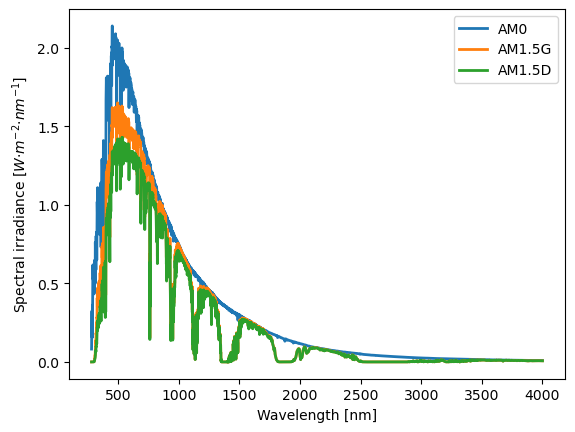

In [8]:
plt.plot(datafile, linewidth=2, label=datafile.columns)
plt.ylabel('Spectral irradiance [$W·m^{-2}·nm^{-1}$]')
plt.xlabel('Wavelength [nm]')
plt.legend()

We calculate the UV content in AM0, AM1.5G, and AM1.5D.

In [6]:
index=datafile.index<=400
for spectra in ['AM0', 'AM1.5G', 'AM1.5D']:
    irradiance=np.trapz(datafile[spectra][index], x = datafile.index[index])
    print('UV irradiance in ' + spectra + ' = ' + str(irradiance.round(1)) + ' W/m2')

UV irradiance in AM0 = 102.8 W/m2
UV irradiance in AM1.5G = 46.1 W/m2
UV irradiance in AM1.5D = 30.5 W/m2
